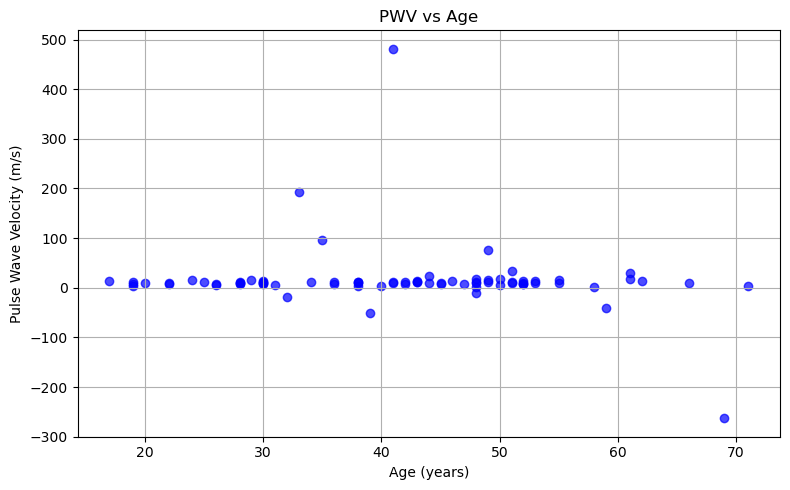

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("merged_patient_features_1_to_87.csv")

# Convert CF_dist from cm to meters
df['CF_dist_m'] = df['CF_dist'] / 100.0

# Convert ptt_cf_mean from ms to seconds
df['ptt_cf_s'] = df['ptt_cf_mean'] / 1000.0

# Calculate PWV (Pulse Wave Velocity)
df['PWV'] = df['CF_dist_m'] / df['ptt_cf_s']

# Remove intermediate columns
df.drop(columns=['CF_dist_m', 'ptt_cf_s'], inplace=True)

# Save updated dataset
df.to_csv("merged_patient_features_with_PWV.csv", index=False)

# Step 6: Plot PWV vs Age
df_plot = df[['Age', 'PWV']].dropna()
plt.figure(figsize=(8, 5))
plt.scatter(df_plot['Age'], df_plot['PWV'], alpha=0.7, color='blue')
plt.title("PWV vs Age")
plt.xlabel("Age (years)")
plt.ylabel("Pulse Wave Velocity (m/s)")
plt.grid(True)
plt.tight_layout()
plt.show()


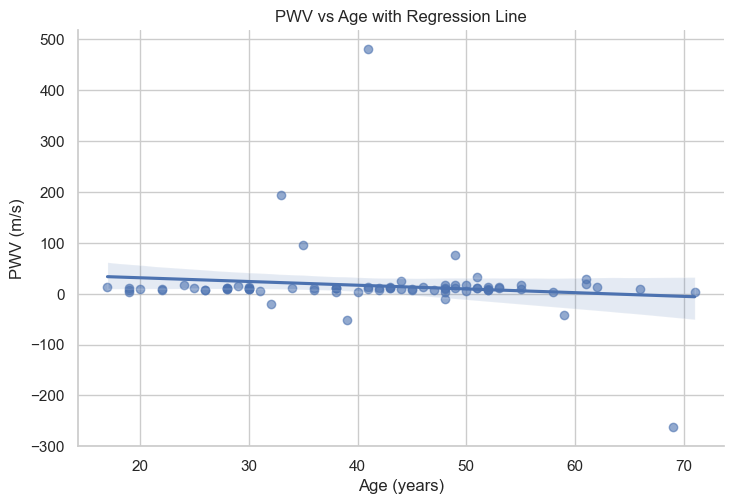

In [5]:
import seaborn as sns

sns.set(style="whitegrid")
sns.lmplot(x="Age", y="PWV", data=df, aspect=1.5, height=5, scatter_kws={"alpha": 0.6})
plt.title("PWV vs Age with Regression Line")
plt.xlabel("Age (years)")
plt.ylabel("PWV (m/s)")
plt.show()


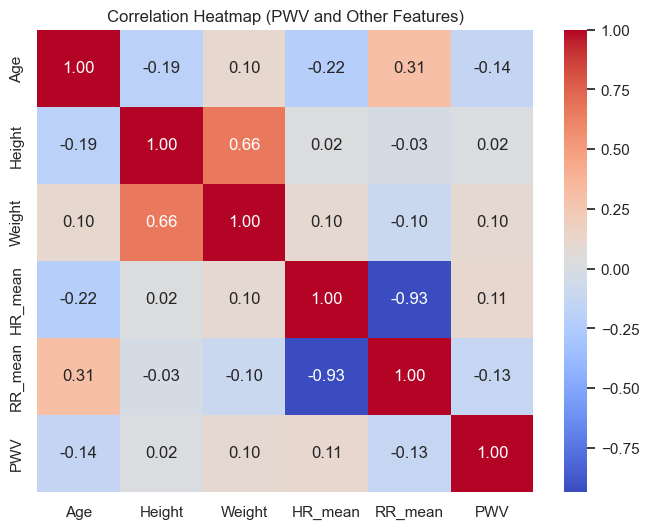

In [7]:
import numpy as np

# Select features to correlate with PWV
features = ['Age', 'Height', 'Weight', 'HR_mean', 'RR_mean', 'PWV']
corr = df[features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (PWV and Other Features)")
plt.show()
